$$\mbox{CASO APLICATIVO DE REGRESIÓN LOGÍSTICA}$$

Integrantes:
    
    -Hernan Carmelo Cavadias Martinez
    -Duvan Santiago Castro Bolivar 
    -David Santiago Buitrago Norato
    -Miguel Angel Malagón Romero

In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Business Understanding

## SECTOR 

El sector de los servicios de suscripción es un modelo de negocio que consiste en que los clientes pagan una cuota recurrente para tener acceso a un determinado producto o servicio sin interrupciones. Este sector ha experimentado un gran crecimiento en los últimos años, especialmente en el ámbito del entretenimiento, el software, la belleza y la alimentación . 

Algunas de las ventajas de este sector son que genera ingresos predecibles, mejora la relación con el cliente, reduce los costes de retención y ofrece oportunidades para ampliar los servicios. Sin embargo, también implica algunos desafíos, como la competencia, la fidelización, la personalización y la innovación. Por lo tanto, las empresas que se dedican a este sector deben tener una buena estrategia de marketing, un buen conocimiento del mercado y del comportamiento del cliente, y una buena capacidad de adaptación y mejora continua. 

Debemos tener en cuenta que además de ser un servicio por suscripción QWE es esencialmente una empresa prestadora de servicios, cuyo modelo de negocio se clasifica en los modelos B2B, es decir, que sus servicios son prestado a empresas que los contratan, en este caso, es manejar su presencia en línea; esto, sumado al modelo de negocio por suscripción nos puede llevar a pensar que esto complica mucho el entendimiento del negocio, sin embargo, los problemas que afectan a este sector de la industria de servicios siguen siendo en la práctica, los mismos. 

## Problemas de retención en servicios de suscripcion 

Algunas de las principales causas de la poca retención en un servicio de suscripción son: 

- Poca interacción (o nada): si los clientes no se sienten valorados o atendidos por la empresa, pueden perder el interés y la confianza en el servicio. Es importante mantener una comunicación constante y efectiva con los clientes, ofrecerles contenido de valor, incentivar su participación y fidelizarlos con beneficios y recompensas. 

- Incompatibilidad del cliente con el producto o mercado: si los clientes no encuentran una solución a sus necesidades o problemas con el servicio, o si el servicio no se adapta a sus preferencias o expectativas, pueden buscar otras alternativas más adecuadas. Es importante segmentar bien el mercado, conocer el perfil y el comportamiento de los clientes, y ofrecerles un servicio personalizado y diferenciado. 

- Errores del producto: si los clientes experimentan fallas o inconvenientes con el servicio, pueden sentirse frustrados e insatisfechos. Es importante garantizar la calidad y el funcionamiento del servicio, resolver rápidamente los problemas que puedan surgir, y ofrecer una garantía o compensación a los clientes afectados. 

- Experiencia del usuario demasiado compleja: si los clientes tienen dificultades para acceder, usar o entender el servicio, pueden sentirse confundidos y abrumados. Es importante simplificar y optimizar la experiencia del usuario, ofrecer una interfaz intuitiva y amigable, y brindar una asistencia técnica eficaz. 

- Falta de asistencia técnica proactiva: si los clientes no reciben una atención rápida y adecuada cuando tienen dudas o problemas con el servicio, pueden sentirse ignorados y desatendidos. Es importante ofrecer un servicio al cliente de calidad, estar disponible en diferentes canales de comunicación, anticiparse a las necesidades y expectativas de los clientes, y brindarles soluciones efectivas. 

- Costo de producto o servicio muy alto: si los clientes perciben que el precio del servicio es demasiado elevado en comparación con el valor que reciben, o con otras opciones disponibles en el mercado, pueden sentirse engañados o estafados. Es importante ofrecer un precio justo y competitivo, mostrar el valor agregado del servicio, y ofrecer opciones de pago flexibles y convenientes. 

## METAS DEL NEGOCIO 

El negocio quiere, fundamentalmente, reducir la cantidad de clientes que deciden retirar su suscripción del servicio que prestan, con esto buscan básicamente aumentar su tasa de retención de usuarios, en el camino, mejorarán también la experiencia general de sus clientes, pues para esto, se propusieron llegar al fondo del asunto, es decir, conocer los motivos que hacen que un cliente que cumple ciertas características, abandone su servicio. Por lo tanto, para determinar si la meta del negocio es satisfecha, el negocio debería aumentar su tasa de retención o en otras palabras, que menos clientes decidan abandonar sus servicios. 

## METAS DE LA MINERÍA DE DATOS 

En el proceso de minería de datos buscamos encontrar las variables determinantes de la decisión de abandonar la suscripción por parte de los clientes bajo las condiciones que encontremos, es decir, encontrar el tipo de cliente con mayor probabilidad de abandonar el servicio de suscripción; con tipo de cliente nos referimos al conjunto de variables que hacen que caigan en una determinada clasificación. 

Para determinar si la minería de datos es éxitosa debemos poder determinar el tipo de cliente que es más probable que desierte del servicio, pues así la empresa podrá desarrollar mejores métodos para evitar llegar al punto de que el cliente cancele y se le ofrezcan descuentos que cuestan mucho a la empresa, por medio de la mejora de la experiencia de estos clientes. 

In [3]:
datos_in = pd.read_excel('datos.xlsx')

In [4]:
datos_in.head()

,ID,Churn,Customer Age,CHI Score 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
0,1,0,67,0,0,0,0,0.0,0.0,0,0,0,31
1,2,0,67,62,4,0,0,0.0,0.0,0,0,-16,31
2,3,0,55,0,0,0,0,0.0,0.0,0,0,0,31
3,4,0,63,231,1,1,-1,3.0,0.0,167,-8,21996,0
4,5,0,57,43,-1,0,0,0.0,0.0,0,0,9,31


## Data Understanding

In [5]:
datos_in.describe()

,ID,Churn,Customer Age,CHI Score 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
count,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,3174.000000,0.050890,13.896802,87.316685,5.058610,0.706318,-0.006932,0.812781,0.030169,15.727903,0.157240,96.310540,1.764613
std,1832.365411,0.219791,11.160078,66.282788,30.828767,1.723961,1.870942,1.320530,1.460336,42.119061,4.660607,3152.411673,17.966020
min,1.000000,0.000000,0.000000,0.000000,-125.000000,0.000000,-29.000000,0.000000,-4.000000,-293.000000,-75.000000,-28322.000000,-648.000000
25%,1587.500000,0.000000,5.000000,24.500000,-8.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-11.000000,0.000000
50%,3174.000000,0.000000,11.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,4760.500000,0.000000,20.000000,139.000000,15.000000,1.000000,0.000000,2.666667,0.000000,23.000000,0.000000,27.000000,3.000000
max,6347.000000,1.000000,67.000000,298.000000,208.000000,32.000000,31.000000,4.000000,4.000000,865.000000,217.000000,230414.000000,61.000000


### ID
3El ID hace referencia a la forma de identificar cada caracter, es un numero determinado para cada cliente

### Customer Age
Es la edad en meses del cliente, es decir cuanto tiempo lleva el cliente asociado a la empresa


In [7]:
Edad = datos_in["Customer Age"]

### Churn
Donde se toma el número 1 como el escenario donde el cliente o suscriptor se queda y 0 donde decida irse.

In [14]:
Churn = datos_in["Churn"]
count_zeros = (Churn == 0).sum().sum()

print(count_zeros)

6024


### Numero de 1
Teniendo en cuenta que se tienen 6347 Obs

In [15]:
6347 - 6024

323

### Chi score en el mes 0
CHI es un indice de felicidad del cliente

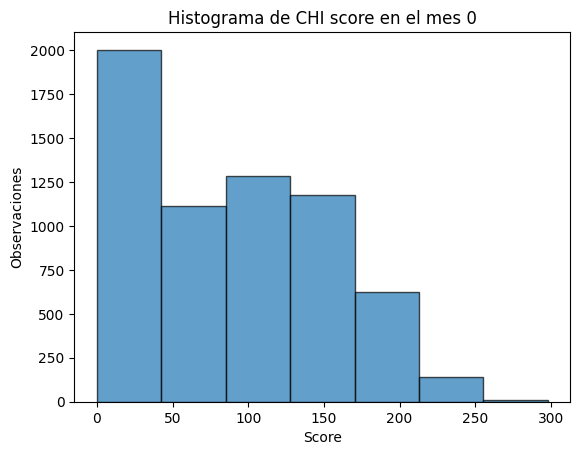

In [20]:
CHI_0 = datos_in["CHI Score 0"]


plt.hist(CHI_0, bins=7, edgecolor='black', alpha=0.7)

# Agregar títulos y etiquetas
plt.title('Histograma de CHI score en el mes 0')
plt.xlabel('Score')
plt.ylabel('Observaciones')

# Mostrar el histograma
plt.show()

### Chi score en el mes 0
CHI es un indice de felicidad del cliente que se mide igual que la variable descrita anteriormente.
### Support cases
Esta variable habla de las veces en las cuales cada ID requirio de atención del sitio en el area de soporte en general expresada en numeros enteros los cuales son el conteo de veces que fue requerido ayuda por parte de la compañia en algún problema con la plataforma u otro percance.
### Suport cases 0-1
Es la variación de la variable anterior de acuerdo al mes anterior.
### SP month 0
Casos de soporte de alta prioridad en el mes 0
### SP 0-1
Variación en casos de alta prioridad desde el mes anterior
### Logins 0-1
Variación del número de veces que el clientes ingresa a la plataforma de QWE
### Views 0-1
Variación de las vistas en los sitios de los clientes

## Data Preparation

In [77]:
datos = datos_in.copy()
datos['Customer Age'] = datos['Customer Age'].apply(lambda x: 1 if x < 14  else 0)

In [78]:
x = datos[datos.columns[2:]].values
y = datos['Churn'].values

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir resultados
print("Exactitud (Accuracy): {:.2f}%".format(accuracy * 100))
print("Matriz de Confusión:")
print(conf_matrix)
print("Informe de Clasificación:")
print(class_report)

Exactitud (Accuracy): 94.88%
Matriz de Confusión:
[[1205    0]
 [  65    0]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1205
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1270
   macro avg       0.47      0.50      0.49      1270
weighted avg       0.90      0.95      0.92      1270



In [80]:
model = sm.Logit(y, x)
result = model.fit()

# Imprimir los coeficientes (betas) del modelo
print("Coeficientes del modelo:")
print(result.params)

# Realizar un test de significancia
print("\nTest de significancia:")
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.224896
         Iterations 9
Coeficientes del modelo:
[-2.12167970e+00 -2.32113586e-02  4.47003574e-03  2.28124283e-02
  3.49431213e-02 -2.94898452e-02 -5.98338606e-02  1.97381108e-03
 -2.73070523e-02 -1.51797812e-04 -2.33968523e-03]

Test de significancia:
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6347
Model:                          Logit   Df Residuals:                     6336
Method:                           MLE   Df Model:                           10
Date:                Wed, 27 Sep 2023   Pseudo R-squ.:                 -0.1182
Time:                        22:09:46   Log-Likelihood:                -1427.4
converged:                       True   LL-Null:                       -1276.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err     

## Modeling

In [81]:
x = datos[['Customer Age','CHI Score 0','CHI Score 0-1','Views 0-1']].values
y = datos['Churn'].values

**PASOS A SEGUIR**

Como notamos en muestra matriz de confusión, tenemos desbalanceada la muestra por lo que vamos a utilizar la técnica de SMOTE VALUE para balancear los 1 frente a los 0.

In [82]:
print('La cantidad de 1 que tenemos en nuestra variable dependiente es:',datos['Churn'].sum())

La cantidad de 1 que tenemos en nuestra variable dependiente es: 323


$$\mbox{BALANCEO DE LA MUESTRA - SMOTE VALUE}$$

In [83]:
smt = SMOTE()
x, y = smt.fit_resample(x, y)

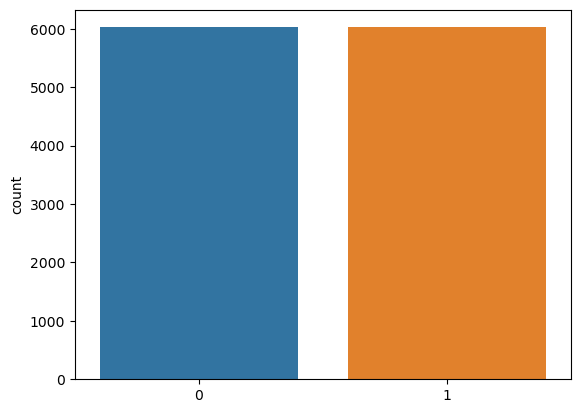

In [84]:
ax = sns.countplot(x=y)

$$\mbox{Modelo de regresión Logística}$$

In [85]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir resultados
print("Exactitud (Accuracy): {:.2f}%".format(accuracy * 100))
print("Matriz de Confusión:")
print(conf_matrix)
print("Informe de Clasificación:")
print(class_report)

Exactitud (Accuracy): 66.93%
Matriz de Confusión:
[[858 345]
 [452 755]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68      1203
           1       0.69      0.63      0.65      1207

    accuracy                           0.67      2410
   macro avg       0.67      0.67      0.67      2410
weighted avg       0.67      0.67      0.67      2410



In [86]:
model = sm.Logit(y, x)
result = model.fit()
# Realizar un test de significancia
print("\nTest de significancia:")
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.663181
         Iterations 6

Test de significancia:
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                12048
Model:                          Logit   Df Residuals:                    12044
Method:                           MLE   Df Model:                            3
Date:                Wed, 27 Sep 2023   Pseudo R-squ.:                 0.04323
Time:                        22:09:57   Log-Likelihood:                -7990.0
converged:                       True   LL-Null:                       -8351.0
Covariance Type:            nonrobust   LLR p-value:                3.443e-156
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4634      0.031    -14.817      0.000      -0.525      -0.402
x2   

En comparación con el modelo inicial, notamos que las variables son significativas y estadisticos como el Pseudo R2 es coherente, por otro lado la matriz de confusión, tiene una capacidad de predicción de no abandonar es decir, que la variable independinte tome el valor de Cero, cerca de el 66% de las veces. 

De la misma manera, el modelo precide el abandonar la suscripción es decir que tome valores iguales a 1 en un 70% de las veces.  

$$\mbox{Probabilidad de mantenerse}$$

In [87]:
proba = result.predict(x)

# Crear un nuevo DataFrame con las probabilidades
df_probabilidades = pd.DataFrame({'Probabilidad': proba})

datos_final = datos[['ID','Churn','Customer Age','CHI Score 0','CHI Score 0-1','Views 0-1']]
datos_final['Probabilidad'] = df_probabilidades

$$\mbox{ANÁLISIS Y RECOMENDACIONES}$$



$$P(Y = 1|x) = logit(x'\beta)$$


Dado que el modelo toma la probabilidad de que la variable independiente sea igual a 1, en este caso quedarse y seguir tomando los servicios, vamos utilizar de manera implícita el complemento, es decir establecer un filtro de los que tengan menor probabilidad (menor a 0.4), con el fin de mirar las características de los individuos, y así proponer alternativas para evitar que abandonen los servicios. 


In [88]:
filtro = datos_final['Probabilidad']<0.4
df_final = datos_final[filtro]

In [92]:
df_final.head()

,ID,Churn,Customer Age,CHI Score 0,CHI Score 0-1,Views 0-1,Probabilidad
3,4,0,0,231,1,21996,0.054995
12,13,0,0,215,15,8658,0.201306
14,15,0,0,118,63,995,0.293890
27,28,0,0,230,0,13043,0.146770
33,34,0,0,91,50,0,0.354616


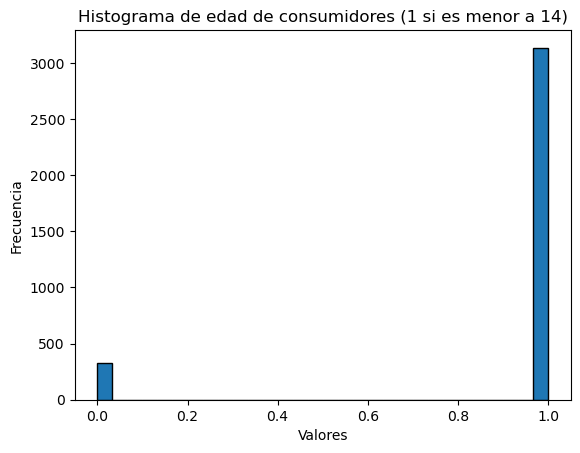

In [91]:
plt.hist(df_final['Customer Age'], bins=30, edgecolor='k') 
plt.title('Histograma de edad de consumidores (1 si es menor a 14)')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

Como podemos analizar, nos debemos centrar en aquellos clientes que tienen una permanecía menor a los 14 meses, dado que el modelo nos muestra que es en esos tiempos de probabilidad de seguir es menor, por lo que las estrategias de atención al cliente deben focalizarse en este grupo poblacional. 

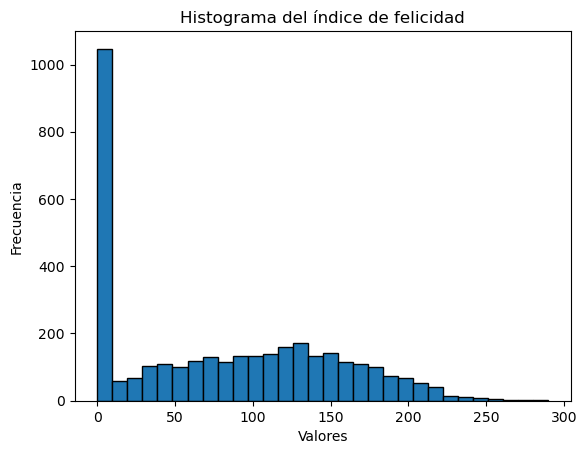

In [94]:
plt.hist(df_final['CHI Score 0'], bins=30, edgecolor='k') 
plt.title('Histograma del índice de felicidad')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

Tal como lo había previsto el CEO, los individuos con menores índices de felicidad son aquellos que tienen una mayor probabilidad de no seguir requiriendo los servicios tecnológicos, dado que no se sienten augustos con los mismos. 